In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [16]:
# Load data from the Excel file
data = pd.read_excel('data.xlsx')

In [17]:
# Step 1: Handle Missing Values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data['Age'] = imputer.fit_transform(data[['Age']])
data['Salary'] = imputer.fit_transform(data[['Salary']])

In [18]:

# Step 2: Remove Outliers using Z-score
z_scores = np.abs(stats.zscore(data[['Age', 'Salary']]))
data = data[(z_scores < 3).all(axis=1)]

In [19]:
# Step 3: Normalize the Data (MinMax Scaling)
scaler = MinMaxScaler()
data[['Age', 'Salary']] = scaler.fit_transform(data[['Age', 'Salary']])



In [20]:
# Step 4: Encode Categorical Variables
data = pd.get_dummies(data, columns=['Country'], drop_first=True)
data['Purchased'] = data['Purchased'].map({'Yes': 1, 'No': 0})  # Convert target variable to binary



In [22]:
# Step 5: Split the Data into Training and Testing Sets
X = data.drop('Purchased', axis=1)  # Features
y = data['Purchased']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [24]:
# Step 6: Train a Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [25]:
# Step 7: Make Predictions
y_pred = model.predict(X_test)



In [26]:
# Step 8: Generate and Display the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)



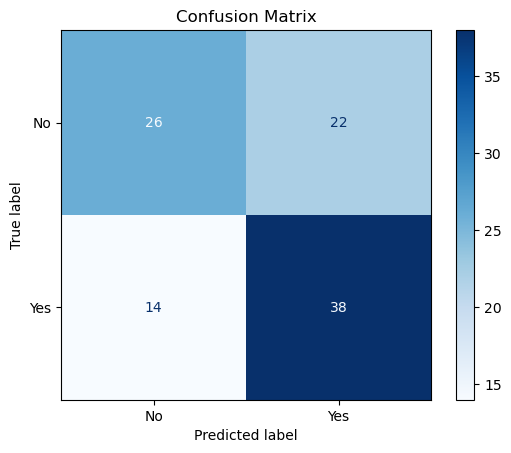

In [27]:
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()